Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files and check the dfs

In [2]:
#folder = "\Archive_6"
folder = ""
households = pd.read_csv(f"..\Datalogs{folder}\Households.csv").sort_index(axis=1)
cons_firms = pd.read_csv(f"..\Datalogs{folder}\Consumer_Firms.csv").sort_index(axis=1)
cap_firms = pd.read_csv(f"..\Datalogs{folder}\Capital_Firms.csv").sort_index(axis=1)
pboard = pd.read_csv(f"..\Datalogs{folder}\Public_Info_Board.csv").sort_index(axis=1)
bank = pd.read_csv(f"..\Datalogs{folder}\Bank.csv").sort_index(axis=1)

Check dataframes

Get sums and averages for each timestep

In [3]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

Calculate number of agents

In [4]:
mask = households['date'].apply(lambda x: np.isnan(x) if isinstance(x, float) else False)

# filter dataframe using mask
filtered_df = households[mask]

In [5]:
timestep = int(households['date'].max())
#timestep = 15
n_households = households.shape[0] / (timestep+1)
n_cons_firms = cons_firms.shape[0] / (timestep +1)
n_cap_firms = cap_firms.shape[0] / (timestep +1)
t = np.linspace(0,timestep, timestep +1)

In [6]:
n_households

10000.0

## Plot the data

In [7]:
import matplotlib.pyplot as plt
import random

def plot_values(df, t, average, exclude_cols=[]):
    cols = [col for col in df.columns if col not in exclude_cols]
    num_plots = len(cols)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(cols):
        title = column + ": (average)" if average else column + ": (sum)"
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        axs[i].plot(t, df[column], label=title, color=color)
        axs[i].set_xlabel('Timestep')
        axs[i].set_ylabel('Values')
        axs[i].set_title(column)
        axs[i].legend()
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()


def plot_histogram(df, times, cols):
    # Plot histogram of each column at each of the times specified
    for col in cols:
        fig, axs = plt.subplots(nrows=1, ncols=len(times), figsize=(15, 5))
        for i, time in enumerate(times):

            axs[i].hist(df[df['date'] == time][col], bins=25)
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
            axs[i].set_title(f'Distr of {col} at t={time}')
        plt.tight_layout()
        plt.show()


### Plot Households

##### Histograms

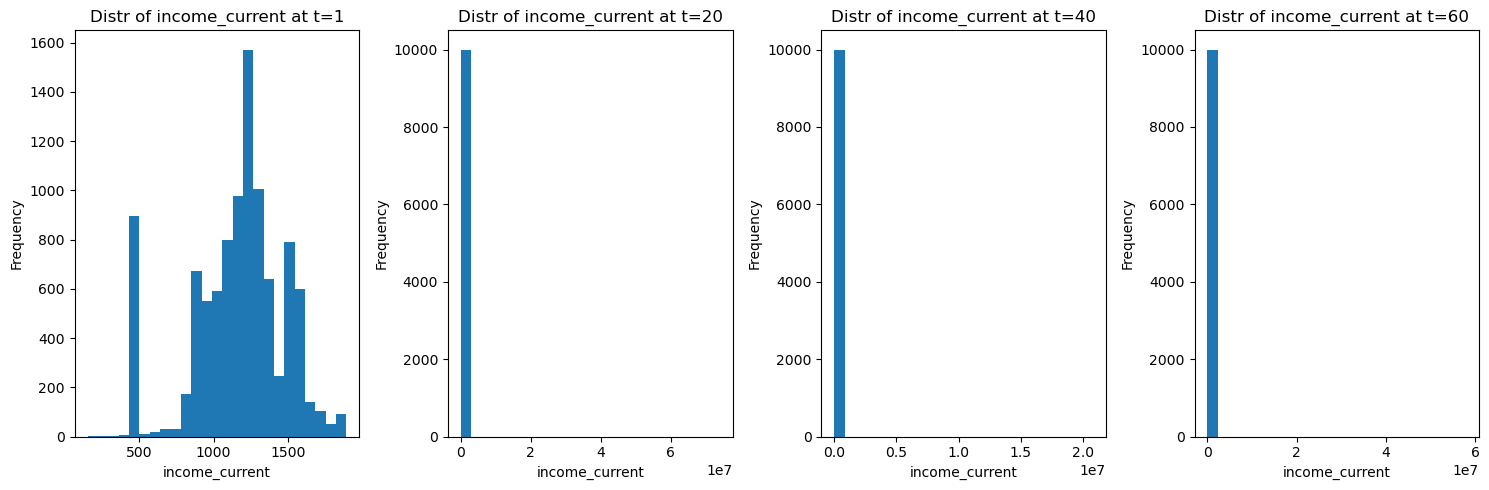

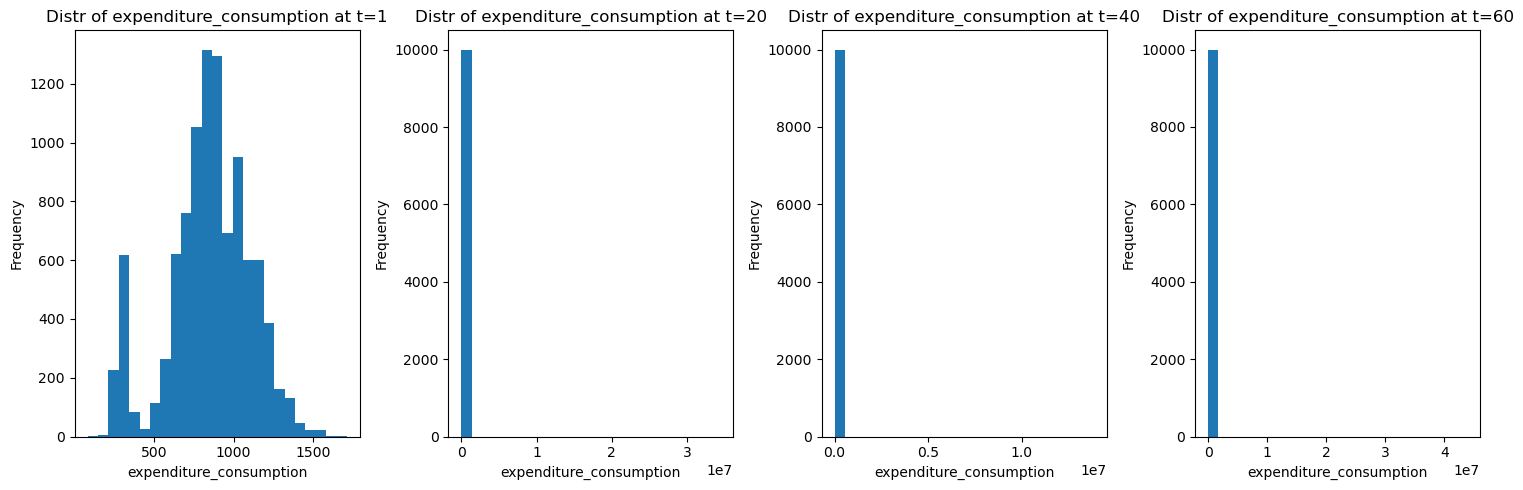

In [8]:
plot_histogram(households, [1, 20, 40, 60], [ 'income_current', "expenditure_consumption"])

#### Plots

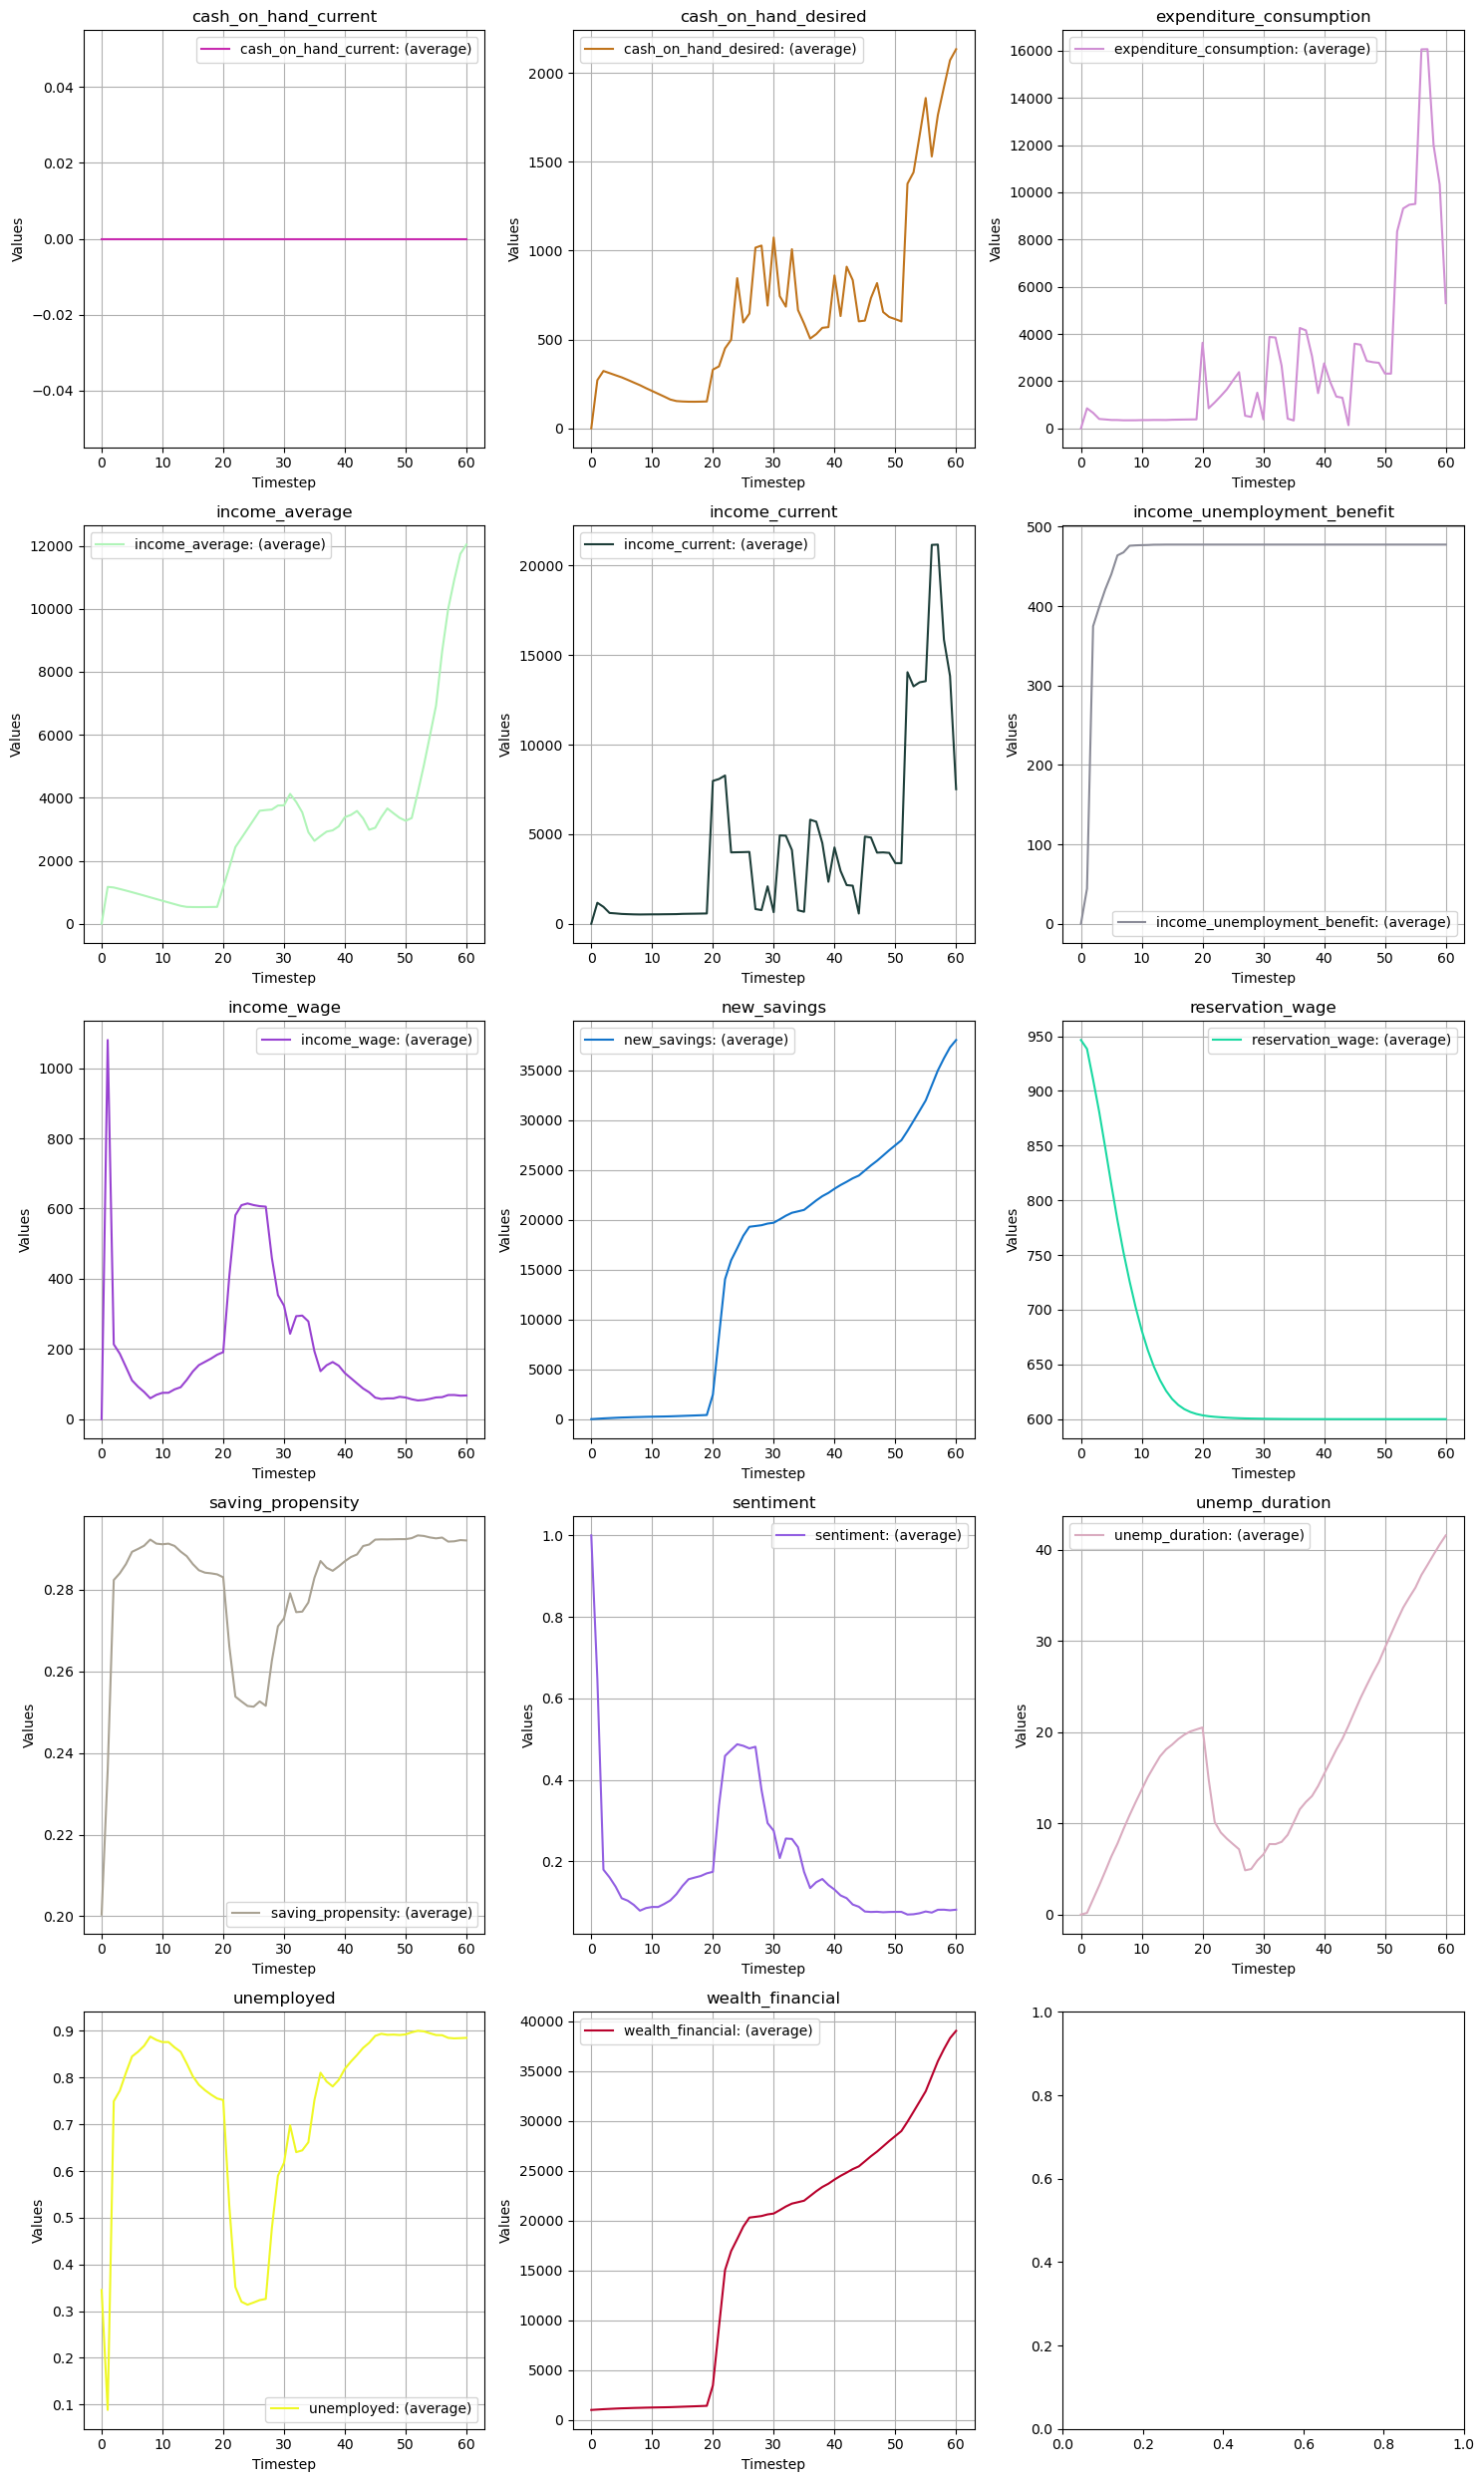

In [9]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date', "c_f", "c_h", "c_excess_money", "wealth_human", "consumption_propensity","income_gov_transfers", "income_firm_owner_dividend", 
                   "expenditure_tax", "business_owner","cash_on_hand_real_desired",
                   "saving_propensity_optimist", "saving_propensity_pessimist", "p_majority_op_adoption", "unemp_duration_upper_bound"] 
plot_values(households_avg,t,True, cols_to_exclude)

###  Plot firms

In [10]:
cols_to_exclude = ['date',"subsidies", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic", "production_past",
                   "is_cons_firm", "inventory_reaction_factor", "desired_labor_capacity_utilization"]

#### Plot Consumer Firms

------ Plotting consumer firms -----


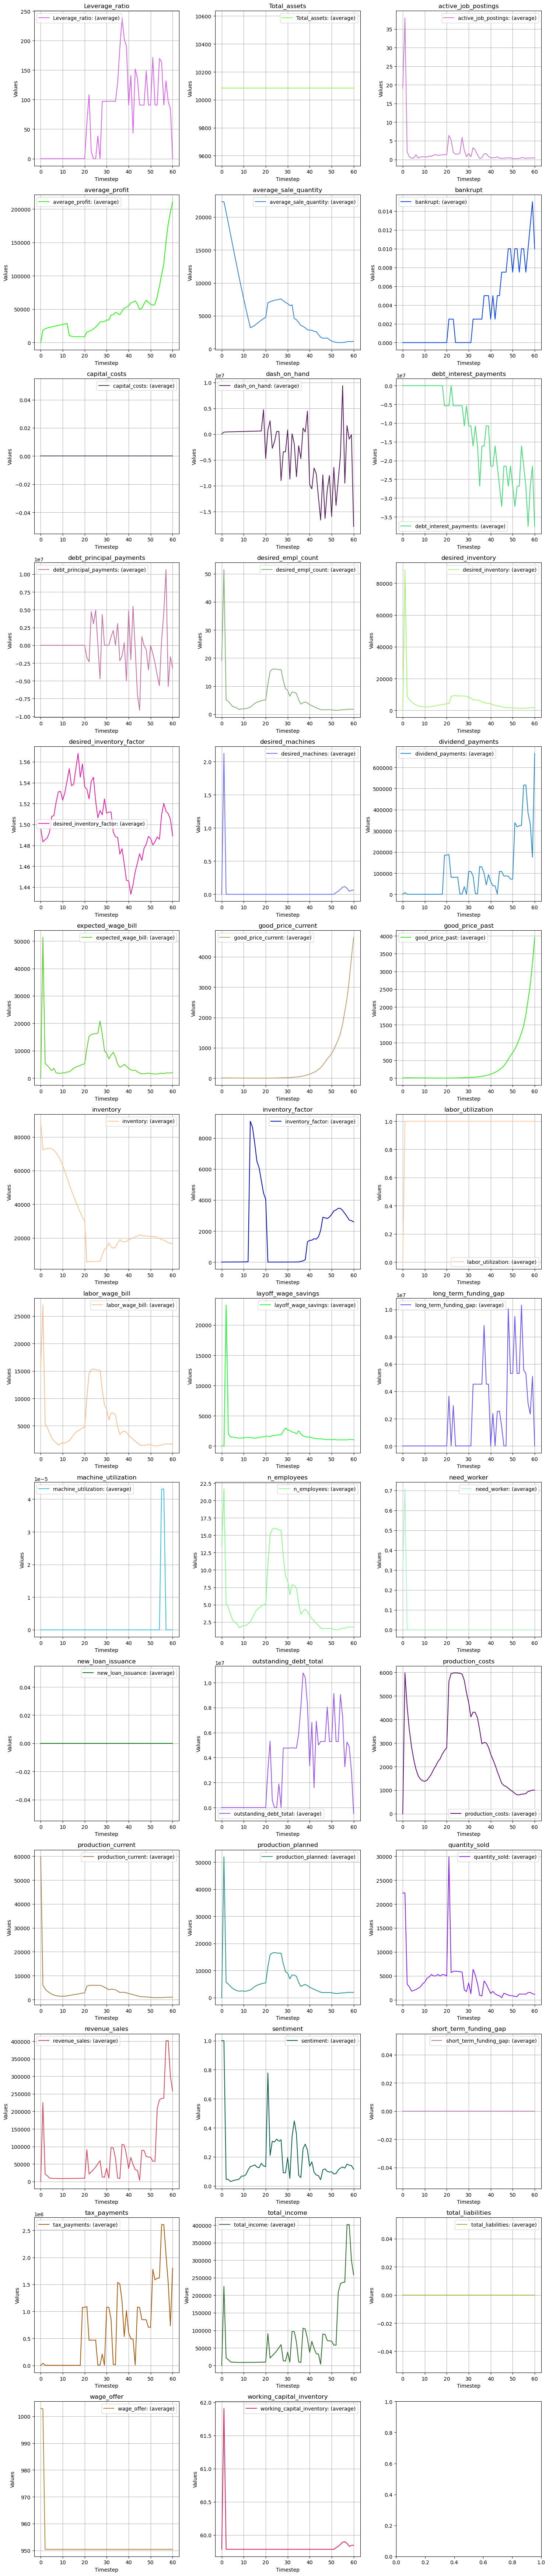

In [11]:
print("------ Plotting consumer firms -----")
#plot_values(cons_firms_sum,t,False, cols_to_exclude)

plot_values(cons_firms_avg,t,True, cols_to_exclude)

#### Histogram for Consumer Firms

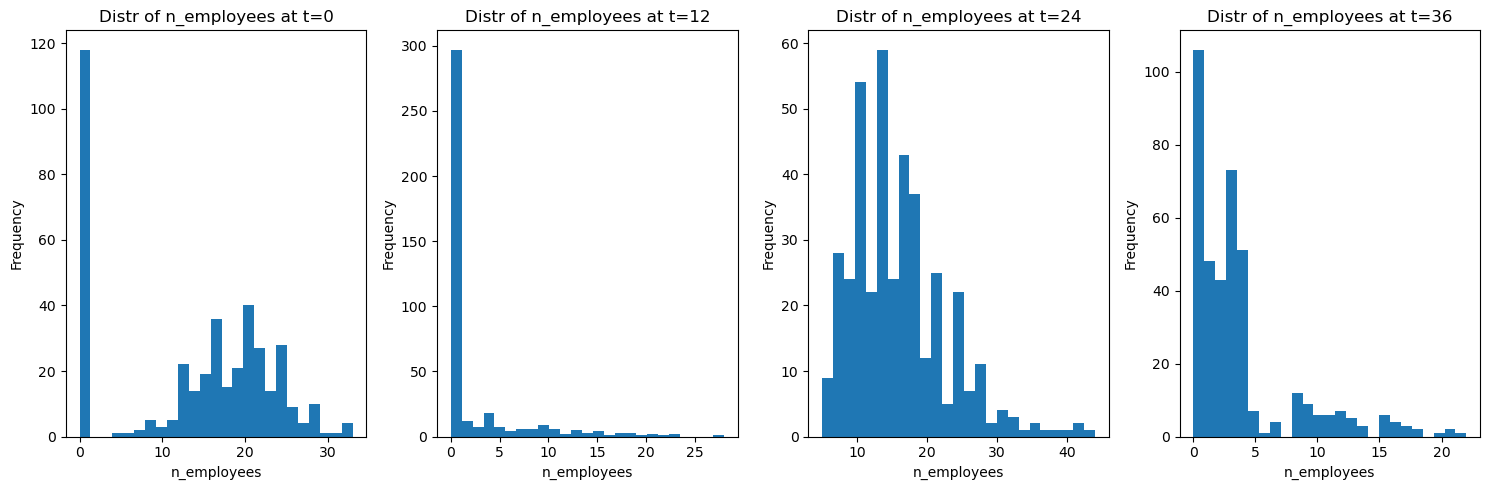

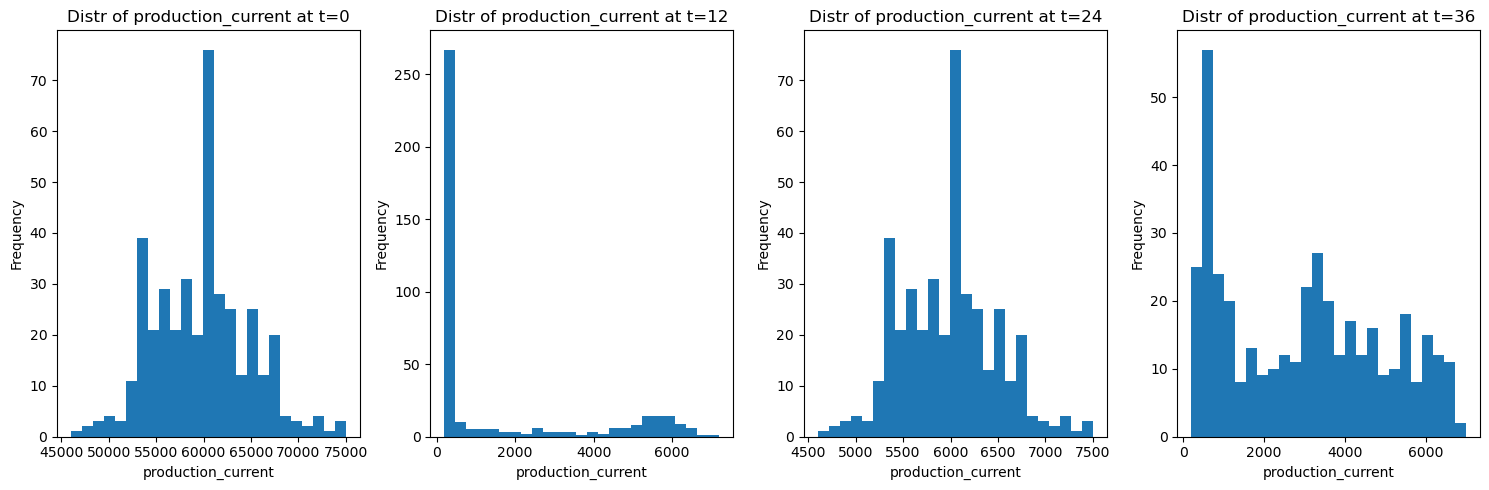

In [12]:
plot_histogram(cons_firms, [0, 12, 24, 36], [ 'n_employees', 'production_current'])

### Capital Firms

------ Plotting capital firms -----


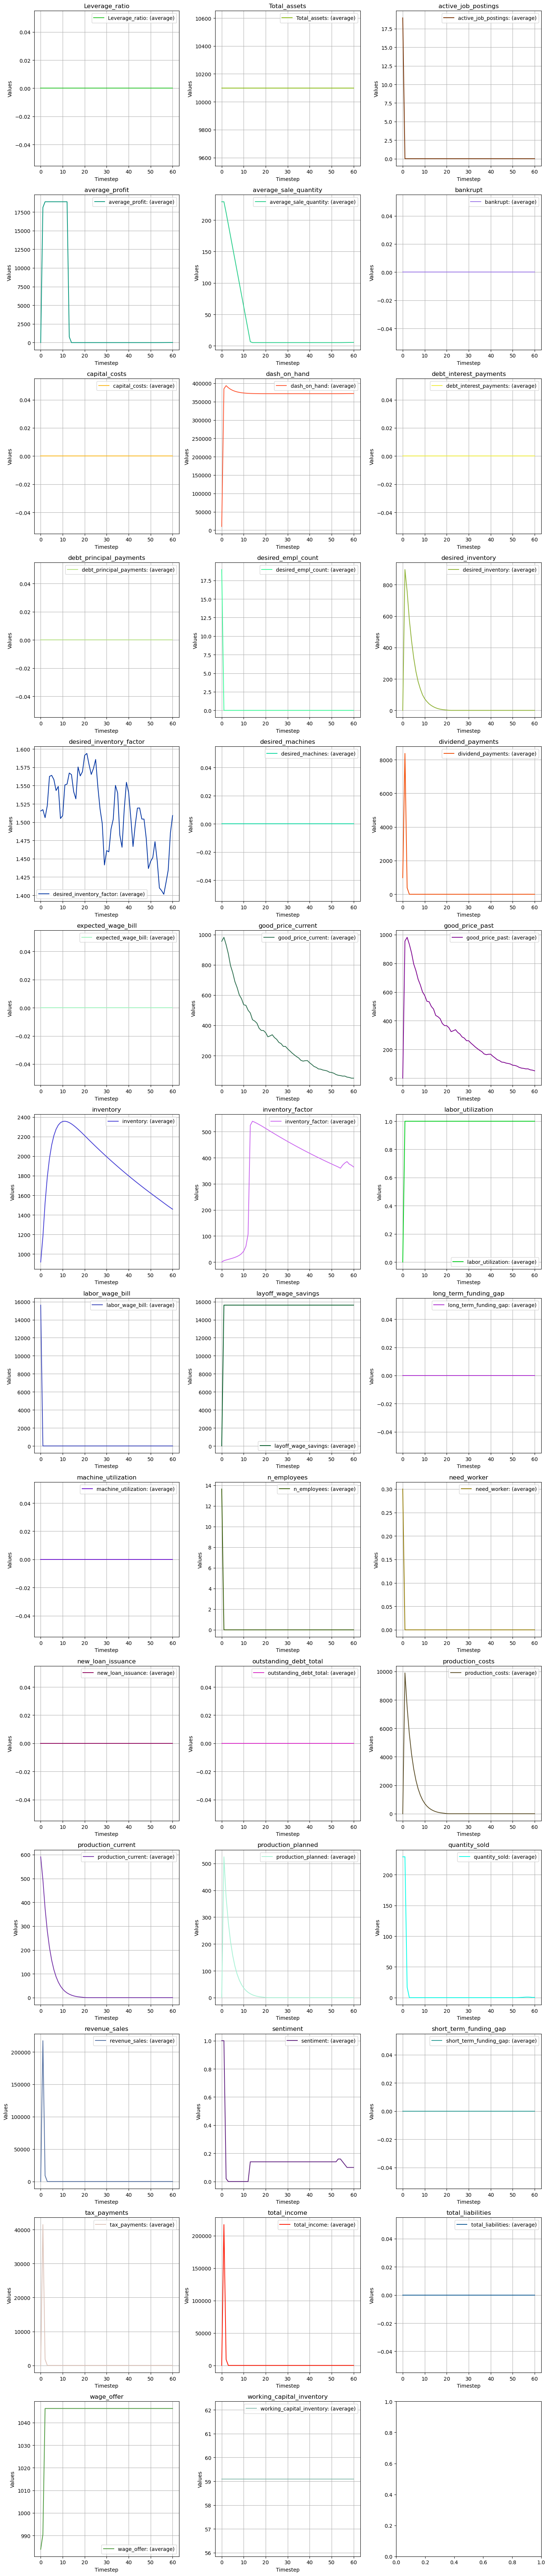

In [13]:
print("------ Plotting capital firms -----")
plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

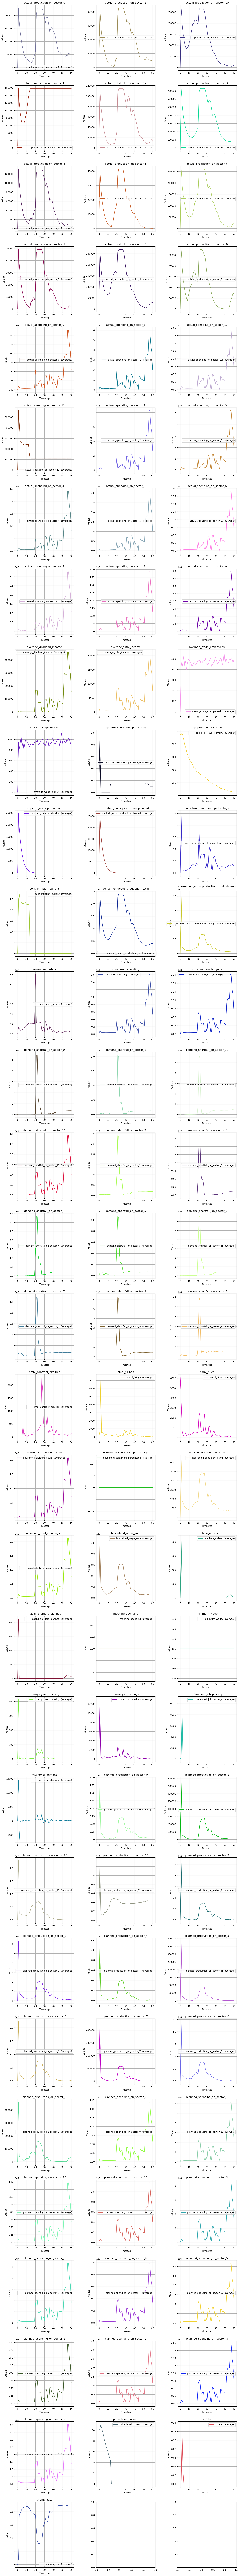

In [14]:
cols_to_exclude = ['date', "price_level_previous","cap_price_level_previous","n_employed", "n_unemployed", "cap_firm_sentiment_sum", 
                "cons_firm_sentiment_sum", "unempl_benefits"]
plot_values(pboard,t,True, cols_to_exclude)

# Bank

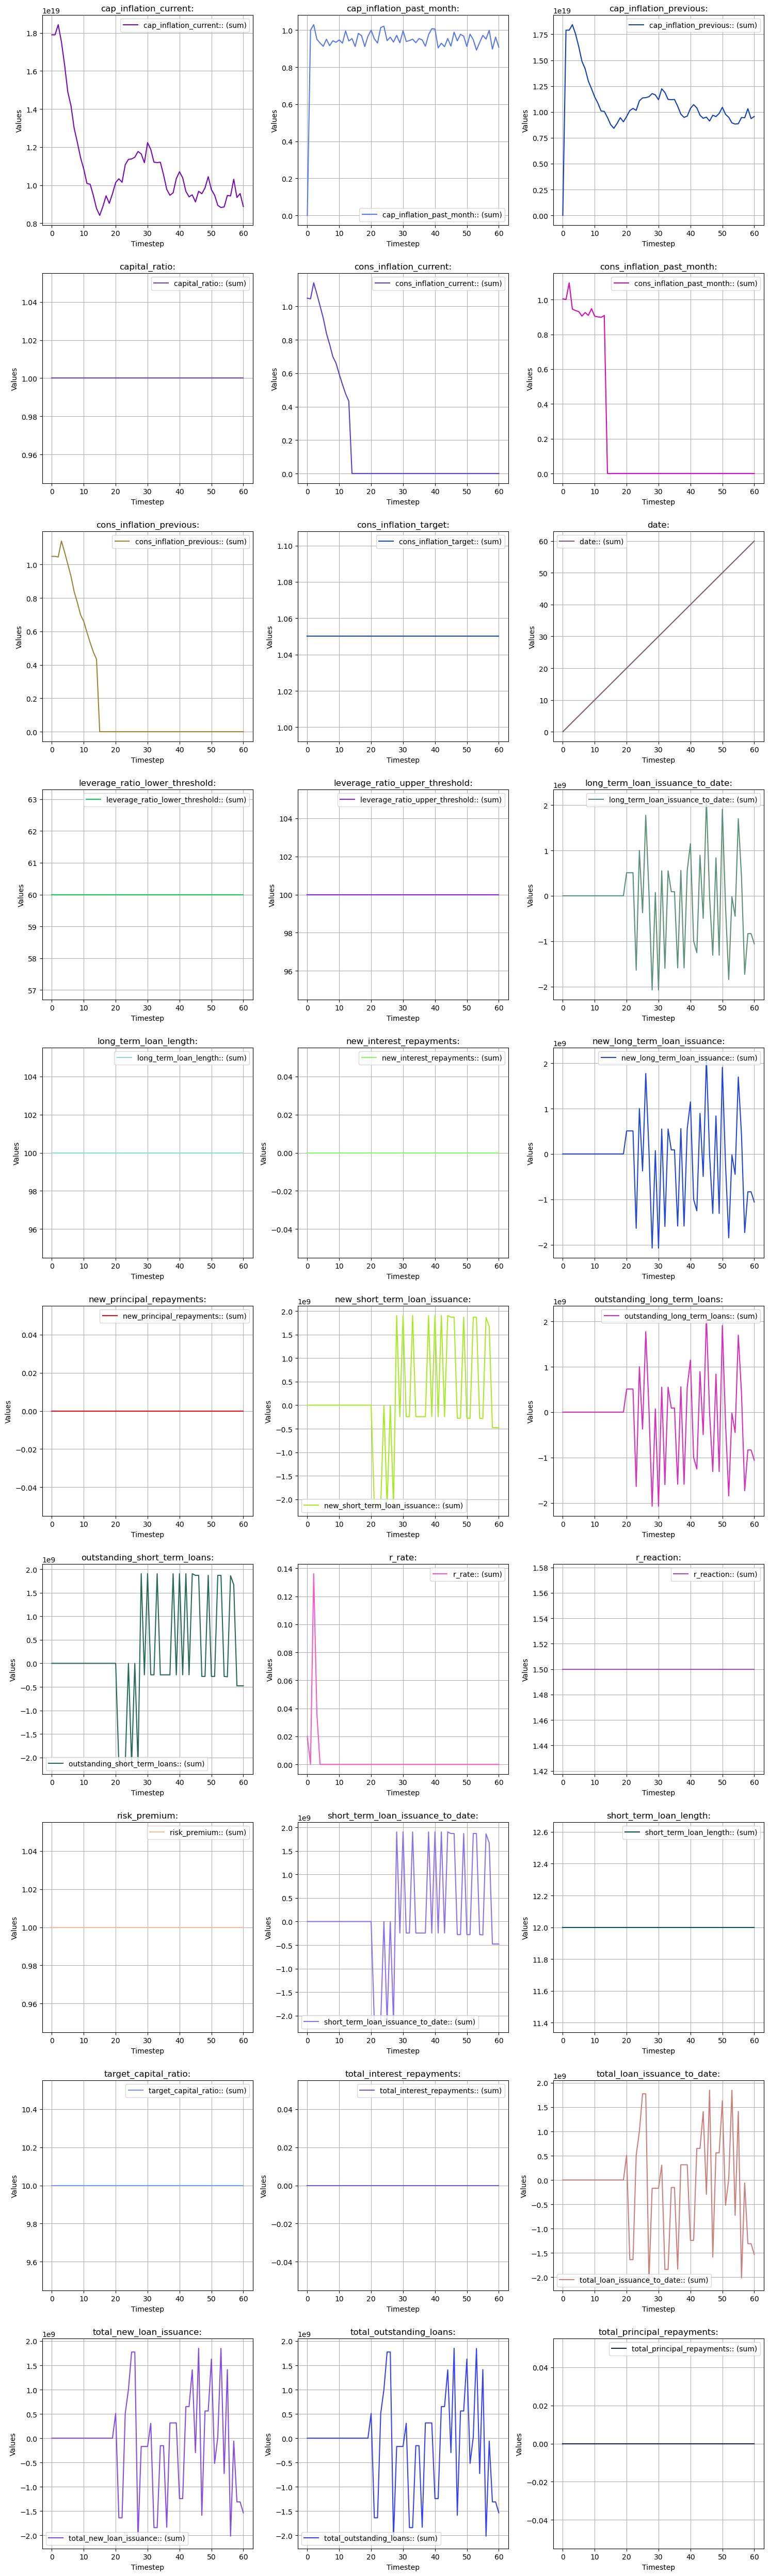

In [15]:
cols_to_exclude = ['date']
plot_values(bank,t,False, cols_to_exclude)

To do: